In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse

%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

import warnings
warnings.filterwarnings(action="ignore")

house_prices_df = pd.read_csv("https://djl-lms-assets.s3.eu-central-1.amazonaws.com/datasets/house_prices.csv", sep = ";")
house_prices_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


**Verilerinizi eğitim ve test kümelerine ayırın.**

In [4]:
new_features = house_prices_df[['YearBuilt','LotArea','OverallQual','TotRmsAbvGrd','FullBath','OverallCond','GarageCars','1stFlrSF','2ndFlrSF','GarageArea',"SalePrice"]]
Y = new_features['SalePrice']
X = new_features[['YearBuilt','LotArea','OverallQual','TotRmsAbvGrd','FullBath','OverallCond','GarageCars','1stFlrSF','2ndFlrSF','GarageArea']]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

print("Eğitim kümesindeki gözlem sayısı : {}".format(X_train.shape[0]))
print("Test kümesindeki gözlem sayısı   : {}".format(X_test.shape[0]))

Eğitim kümesindeki gözlem sayısı : 1168
Test kümesindeki gözlem sayısı   : 292


**Modelinizi eğitim kümesinden önceki derste olduğu gibi oluşturun. Modelinizin uygunluğunu değerlendirin.**

In [5]:
X_train = sm.add_constant(X_train)

sonuclar = sm.OLS(y_train, X_train).fit()

sonuclar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     412.0
Date:                Sat, 04 Dec 2021   Prob (F-statistic):               0.00
Time:                        00:47:51   Log-Likelihood:                -13927.
No. Observations:                1168   AIC:                         2.788e+04
Df Residuals:                    1157   BIC:                         2.793e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.027e+06   1.05e+05     -9.770      0.000   -1.23e+06   -8.21e+05
YearBuilt      464.5283     53.930      8.614      0.000     358.718     570.339
LotArea          0.6172      0.107      5.783      0.000       0.408       0.827
OverallQual    2.09e+04   1281.104     16.316      0.000    1.84e+04    2.34e+04
TotRmsAbvGrd  1715.6590   1205.306      1.423      0.155    -649.172    4080.490
FullBath     -3621.0743   2875.235     -1.259      0.208   -9262.333    2020.185
OverallCond   5975.9057   1059.358      5.641      0.000    3897.428    8054.384
GarageCars    1.074e+04   3367.308      3.190      0.001    4136.424    1.73e+04
1stFlrSF        65.9808      5.104     12.928      0.000      55.967      75.995
2ndFlrSF        43.5001      4.658      9.339      0.000      34.361      52.639
GarageArea      17.6659     11.306      1.563      0.118      -4.517      39.849
==============================================================================
Omnibus:                      395.287   Durbin-Watson:                   1.940
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            41464.194
Skew:                          -0.519   Prob(JB):                         0.00
Kurtosis:                      32.171   Cond. No.                     1.49e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.49e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

R-Squared değerine baktığımızda %78 olduğunu görmekteyiz. Bizim için iyi denebilecek seviyede bir model çıkmıştır.

**Test kümesindeki ev fiyatlarını tahmin edin ve bu derste belirttiğimiz metrikleri kullanarak modelinizin performansını değerlendirin.**

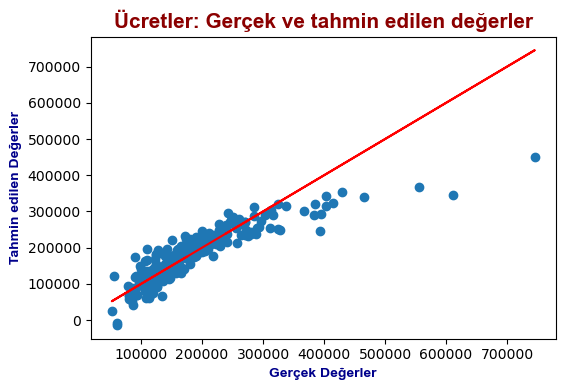

Ortalama Mutlak Hata (MAE)        : 25770.122700212716
Ortalama Kare Hata (MSE)          : 1676601958.4375508
Kök Ortalama Kare Hata (RMSE)     : 40946.33021941711
Ortalama Mutlak Yüzde Hata (MAPE) : 15.09340274779195


In [6]:
X_test = sm.add_constant(X_test)

y_preds = sonuclar.predict(X_test)


baslik_font = {'family': 'arial','color':  'darkred','weight': 'bold','size': 15 }
eksen_font = {'family': 'arial','color':  'darkblue','weight': 'bold','size': 10 }
plt.figure(dpi = 100)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("Gerçek Değerler", fontdict=eksen_font)
plt.ylabel("Tahmin edilen Değerler", fontdict=eksen_font)
plt.title("Ücretler: Gerçek ve tahmin edilen değerler", fontdict=baslik_font)
plt.show()

print("Ortalama Mutlak Hata (MAE)        : {}".format(mean_absolute_error(y_test, y_preds)))
print("Ortalama Kare Hata (MSE)          : {}".format(mse(y_test, y_preds)))
print("Kök Ortalama Kare Hata (RMSE)     : {}".format(rmse(y_test, y_preds)))
print("Ortalama Mutlak Yüzde Hata (MAPE) : {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

Düşük değerler için yüksek tahmin çıkmıştır. MAPE'ye baktığımızda yüzde 15 çıktığını görüyoruz. Bu değer bir miktar düşüktür. Daha düşük olması daha çok işimize gelir. Tahmin performansında iyi diyebiliriz.

**Modelinizin performansı tatmin edici mi? Açıklayın.**

Modelin performansı kötü olmamakla birlikte tatmin edici bulmamaktayım. Çünkü yeni özellikler bulunarak R-Kare değeri arttırılabilir ve MAE,MSE,RMSE,MAPE değerleri daha da düşürülebilir.

**Bazı değişkenleri ekleyerek veya çıkararak modelinizi tahmin performansı açısından geliştirmeye çalışın.**

In [49]:
new_features = house_prices_df[['YearBuilt','LotShape','Heating','KitchenQual','LotArea','OverallQual','TotRmsAbvGrd','FullBath','OverallCond','GarageCars','1stFlrSF','2ndFlrSF','GarageArea',"SalePrice"]]

new_features["LotShape"] = new_features.LotShape.replace({'Reg':3, "IR1":2,'IR2':1, "IR3":0})
new_features["KitchenQual"] = new_features.KitchenQual.replace({'Ex':4, "Gd":3,'TA':2, "Fa":1,'Po':0})
new_features["Heating"] = new_features.Heating.replace({'Floor':0, "GasA":1,'GasW':2, "Grav":3,'OthW':4, "Wall":5})

In [50]:
new_features

,YearBuilt,LotShape,Heating,KitchenQual,LotArea,OverallQual,TotRmsAbvGrd,FullBath,OverallCond,GarageCars,1stFlrSF,2ndFlrSF,GarageArea,SalePrice
0,2003,3,1,3,8450,7,8,2,5,2,856,854,548,208500
1,1976,3,1,2,9600,6,6,2,8,2,1262,0,460,181500
2,2001,2,1,3,11250,7,6,2,5,2,920,866,608,223500
3,1915,2,1,3,9550,7,7,1,5,3,961,756,642,140000
4,2000,2,1,3,14260,8,9,2,5,3,1145,1053,836,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1999,3,1,2,7917,6,7,2,5,2,953,694,460,175000
1456,1978,3,1,2,13175,6,7,2,6,2,2073,0,500,210000
1457,1941,3,1,3,9042,7,9,2,9,1,1188,1152,252,266500
1458,1950,3,1,3,9717,5,5,1,6,1,1078,0,240,142125


In [51]:
Y = new_features['SalePrice']
X = new_features[['YearBuilt','LotShape','LotArea','OverallQual','Heating','KitchenQual','TotRmsAbvGrd','FullBath','OverallCond','GarageCars','1stFlrSF','2ndFlrSF','GarageArea']]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

In [52]:
X_train = sm.add_constant(X_train)

sonuclar = sm.OLS(y_train, X_train).fit()

sonuclar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     333.2
Date:                Sat, 04 Dec 2021   Prob (F-statistic):               0.00
Time:                        19:06:36   Log-Likelihood:                -13902.
No. Observations:                1168   AIC:                         2.783e+04
Df Residuals:                    1154   BIC:                         2.790e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -8.424e+05   1.11e+05     -7.561      0.000   -1.06e+06   -6.24e+05
YearBuilt      370.8905     56.107      6.610      0.000     260.808     480.973
LotShape     -2515.7628   1965.736     -1.280      0.201   -6372.579    1341.053
LotArea          0.6082      0.109      5.561      0.000       0.394       0.823
OverallQual   1.797e+04   1329.359     13.516      0.000    1.54e+04    2.06e+04
Heating       -525.6000   3486.222     -0.151      0.880   -7365.644    6314.444
KitchenQual   1.526e+04   2218.240      6.879      0.000    1.09e+04    1.96e+04
TotRmsAbvGrd  1992.2224   1182.922      1.684      0.092    -328.696    4313.141
FullBath     -4392.9626   2838.448     -1.548      0.122   -9962.059    1176.133
OverallCond   4576.2588   1069.373      4.279      0.000    2478.126    6674.392
GarageCars    9983.9746   3314.901      3.012      0.003    3480.067    1.65e+04
1stFlrSF        62.7836      5.039     12.459      0.000      52.897      72.670
2ndFlrSF        42.1203      4.585      9.186      0.000      33.124      51.116
GarageArea      15.0536     11.122      1.353      0.176      -6.769      36.876
==============================================================================
Omnibus:                      422.938   Durbin-Watson:                   1.938
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            48421.358
Skew:                          -0.625   Prob(JB):                         0.00
Kurtosis:                      34.518   Cond. No.                     1.61e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.61e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Denediğim feature'larla en falza yüzde 79 a çıkarabildim R-Kareyi.

In [53]:
X_test = sm.add_constant(X_test)

y_preds = sonuclar.predict(X_test)

print("Ortalama Mutlak Hata (MAE)        : {}".format(mean_absolute_error(y_test, y_preds)))
print("Ortalama Kare Hata (MSE)          : {}".format(mse(y_test, y_preds)))
print("Kök Ortalama Kare Hata (RMSE)     : {}".format(rmse(y_test, y_preds)))
print("Ortalama Mutlak Yüzde Hata (MAPE) : {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

Ortalama Mutlak Hata (MAE)        : 24824.536143467838
Ortalama Kare Hata (MSE)          : 1572296866.257988
Kök Ortalama Kare Hata (RMSE)     : 39652.198756916216
Ortalama Mutlak Yüzde Hata (MAPE) : 14.46228052600744


Değerlerin düştüğü gözlemlenmektedir.